In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.datasets import make_classification

In [36]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                          n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

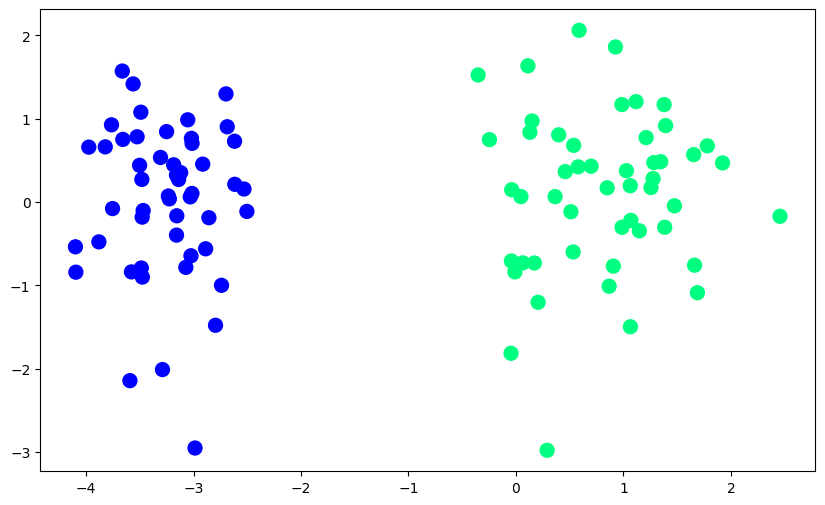

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [38]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights= np.ones(X.shape[1])
    lr=0.1

    for i in range(1000):
        j = np.random.randint(0,100)            # we will choose a random point from data
        y_hat=step(np.dot(X[j],weights))         # storing of the data and redicting in yhat
        weights= weights + lr*(y[j]-y_hat)*X[j]     # we will write a formula summing for both 2 conditions discussed updating the weights if any error occured

    return weights[0],weights[1:]

In [39]:
np.dot(np.insert(X[41],0,1),[1,1,1])

-1.40369174748523

In [40]:
np.ones(3)

array([1., 1., 1.])

In [41]:
def step(z):
  return 1 if z>0 else 0

In [42]:
step(0.2946)

1

In [43]:
intercept_,coef_ = perceptron(X,y)

In [44]:
print(intercept_)
print(coef_)

1.3000000000000003
[1.05343617 0.2221512 ]


In [45]:
m = (coef_[0]/coef_[1])
b = (intercept_/coef_[1])

In [46]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

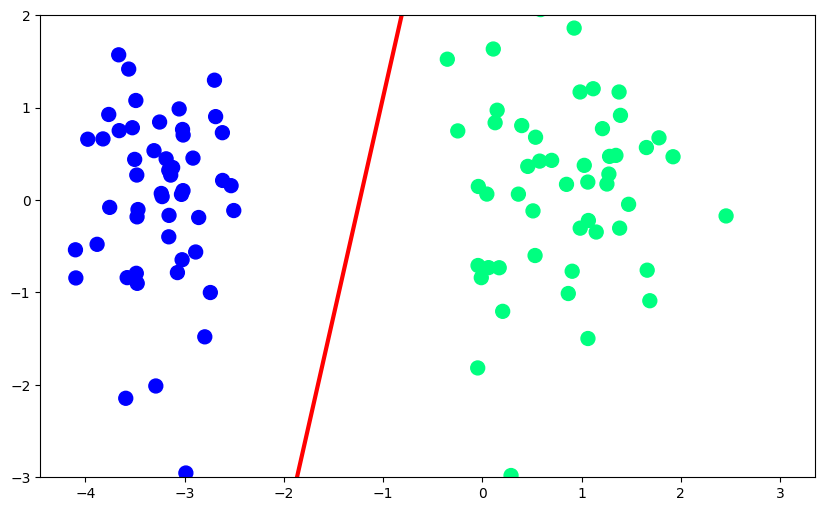

In [47]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [48]:
from sklearn.linear_model import LogisticRegression
lor= LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [49]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b= -(lor.intercept_/lor.coef_[0][1])

In [50]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

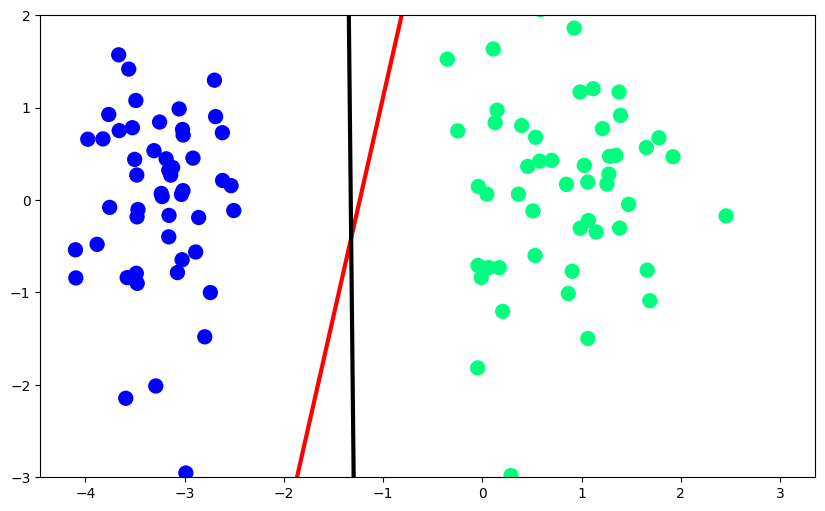

In [51]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

red line is occcured because of perceptron trick .



and





black line has occured because of logistic regression.

perceptron trick stops right where the
points are correctly classified and the
position of it remains at the end of last classified point.



---













where as the logistic regression line is in very accurate position between both classified points in an equal distace to both seperating in morebetter manner.and would show less error as it sperats both the points in a equal basis.


---



### **TO CORRECT THE PERCEPTON TRICK**

In [59]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights= np.ones(X.shape[1])
    lr=0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat=sigmoid(np.dot(X[j],weights))
        weights= weights + lr*(y[j]-y_hat)*X[j]
    return weights[0],weights[1:]

we just replaced the step function from sigmoid fuction to get better results

In [60]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [61]:
intercept_,coef_ = perceptron(X,y)

In [62]:
print(intercept_)
print(coef_)

2.859625406106392
[2.84832887 0.21951134]


In [63]:
m = (coef_[0]/coef_[1])
b = (intercept_/coef_[1])

In [64]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

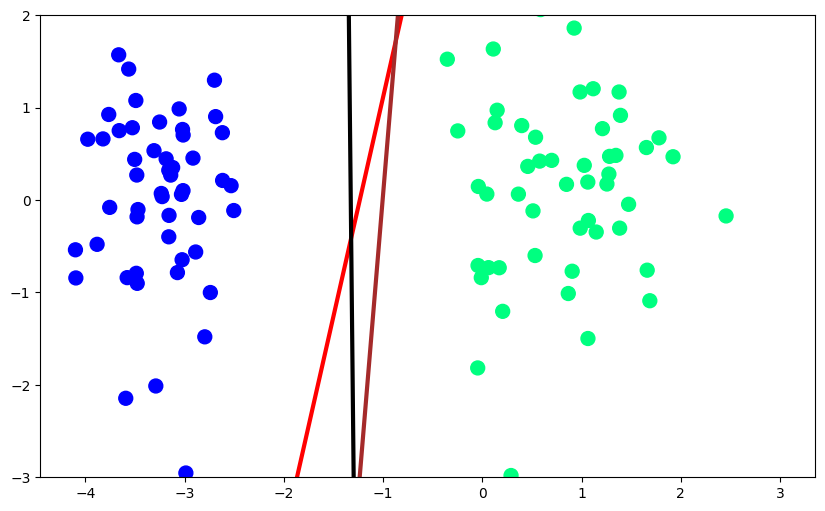

In [65]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

red line is occcured because of perceptron trick .



brown line is a improved version of red with adding sigmoid to its code



and





black line has occured because of logistic regression.